Quantum teleportation
---

- [src](https://quantum-computing.ibm.com/lab/docs/iql/manage/systems/dynamic-circuits/Teleportation)

In the documents of IBM qiskit demonstrated an ionteresting example, Quantum teleportation; it describes that
1. Alise and Bob seperated very far with each other.
2. they share an entanglement qubits; they can transmit quantum state via classical communicationso called, so called `Quantum teleportation`.

Let us implement the code.


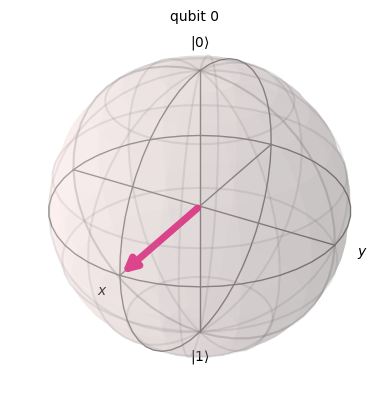

In [1]:
# rotate pi/2 along Y-axis 

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from numpy import pi
qc = QuantumCircuit(1)

qc.ry(pi/2, 0)
state = Statevector.from_instruction(qc)
display(state.draw('bloch'))

In [2]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_provider import IBMProvider

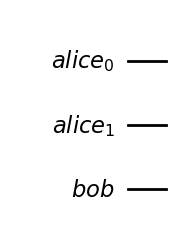

In [3]:
# register three-qubits QC, 2 for Alice and one for Bob
alice_reg = QuantumRegister(2, name="alice")
bob_reg = QuantumRegister(1, name="bob")
qc = QuantumCircuit(alice_reg, bob_reg)

qc.draw("mpl")

In [4]:
# 
bob_class_reg = ClassicalRegister(1)
qc.add_register(bob_class_reg)
#qc.draw("mpl")

In [5]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a)  # Put qubit a into state |+>
    qc.cx(a, b)  # CNOT with a as control and b as target

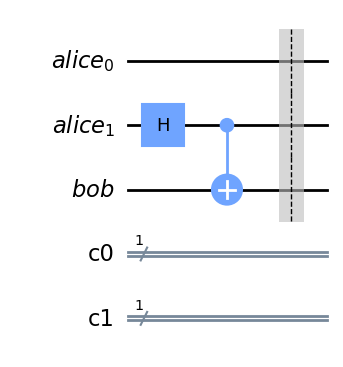

In [6]:
# STEP 1
alice_bell_class_reg = ClassicalRegister(1)
qc.add_register(alice_bell_class_reg)
create_bell_pair(qc, alice_reg[1], bob_reg[0])

qc.barrier() 
qc.draw("mpl")

In [7]:
# step 2, define Alice transmited qubit
from math import pi

qc.ry(pi/2, alice_reg[0]) #use any angle you wish
alice_psi_class_reg = ClassicalRegister(1)
qc.add_register(alice_psi_class_reg)
qc.barrier()
#qc.draw(output='mpl')

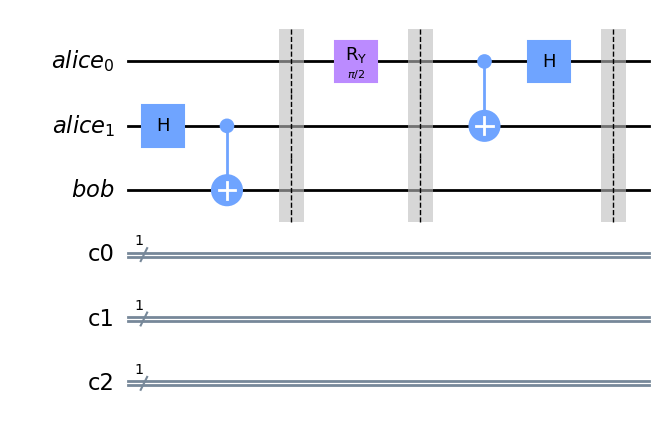

In [8]:
# Step3, apply two gates to the first Alice
qc.cx(alice_reg[0], alice_reg[1])
qc.h(alice_reg[0])
qc.barrier()
qc.draw(output='mpl')

In [9]:
qc.measure(alice_reg[0], alice_psi_class_reg)
qc.measure(alice_reg[1], alice_bell_class_reg)

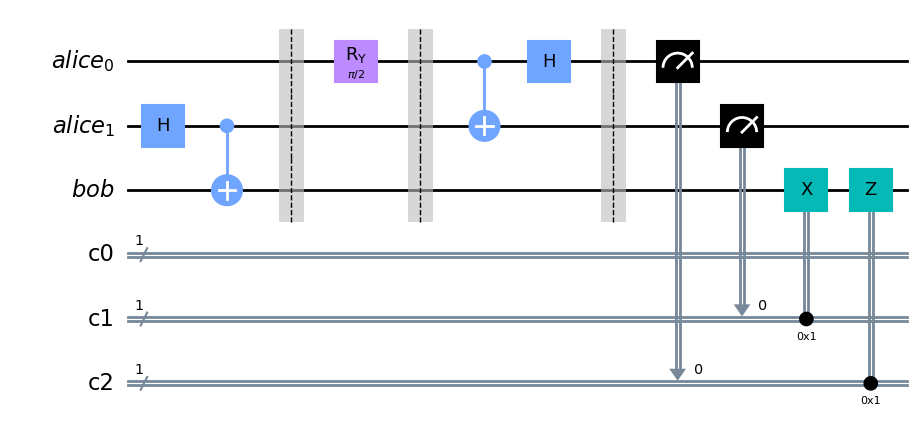

In [10]:
# Apply X to Bob if 2nd qubit measured to 1
qc.x(bob_reg[0]).c_if(alice_bell_class_reg, 1)
# Apply X to Bob if 1st qubit measured to 1
qc.z(bob_reg[0]).c_if(alice_psi_class_reg, 1)
qc.draw("mpl")

The qubit has now been teleported and recovered! Finally, we’ll apply that $-\pi/4$ gate to ensure we measure zeros and then measure Bob’s qubit:



In [11]:
#qc.barrier()
qc.ry(-pi/2, bob_reg[0])
qc.measure(bob_reg[0], bob_class_reg)
#qc.draw(output='mpl')

In [12]:
from qiskit import BasicAer, execute
backend = BasicAer.get_backend('qasm_simulator')
results = execute(qc, backend=backend).result()

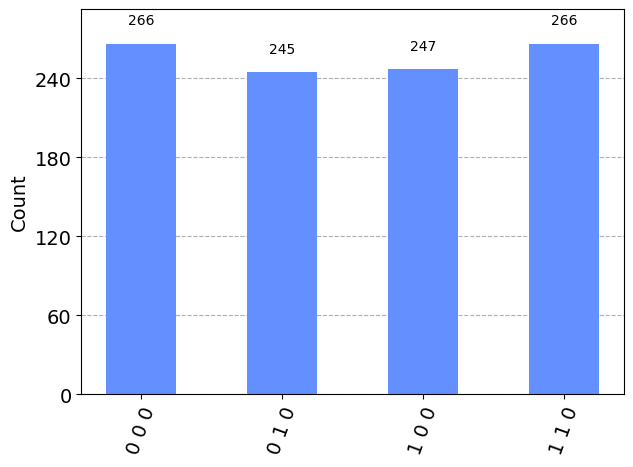

In [13]:
from qiskit.visualization import plot_histogram
measurement_result=results.get_counts()
plot_histogram(measurement_result)

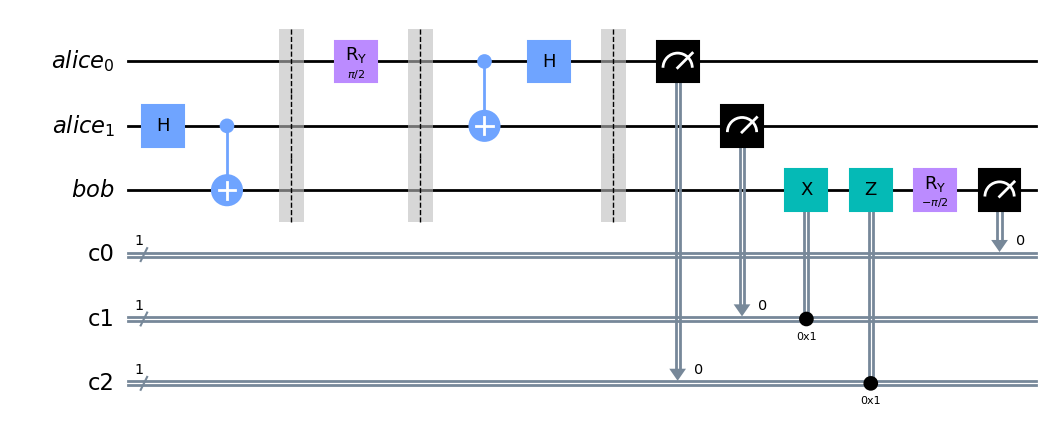

In [14]:
qc.draw(output='mpl')

Conclusion
---
Reference the last circuit vis,
1. the second and third quibits are used for corrections, (c1 and c2).
2. The last histogram shows that these happen randomly.
3. The first qubit, (c0), is ALWAYS 0.

Not only $\Psi$ transported successfully, but we correct it whatever the conbination of Alice's   measurement.   

Exercise
---
Use rotate $\Psi$ by $\pi/4$ about $X$-axis, and check the result again. 